
# Maths emlyon 2023 - Detailed Analytical and Numerical Demonstrations

This notebook extensively covers multiple mathematical themes from the Maths S emlyon 2023 examination.



## Section 1: Refined Approximation of $\sum_{k=1}^n \frac{x^k}{k}$ via Integral Correction Term

### Comparison between Harmonic Series and Natural Logarithm

We study the asymptotic behavior of the difference between the harmonic series and the natural logarithm:
$$ H_n = \sum_{k=1}^n \frac{1}{k}, \quad \ln(n) $$

This analysis is motivated by the classical result:
$$ H_n = \ln(n) + \gamma + \varepsilon_n \quad \text{with } \varepsilon_n \to 0 \text{ and } \gamma \text{ the Euler-Mascheroni constant.} $$

We aim to:
- Prove the inequality:
  $$ \int_1^n \frac{1}{t}dt \leq \sum_{k=1}^n \frac{1}{k} \leq 1 + \int_1^n \frac{1}{t}dt $$
- Deduce the convergence of $$ H_n - \ln(n) $$



#### Integral comparison
We define:
- $$ H_n = \sum_{k=1}^n \frac{1}{k} $$
- $$ I_n = \int_1^n \frac{1}{t}dt = \ln(n) $$

We show numerically that:
$$ H_n - \ln(n) \to \gamma \approx 0.5772 $$

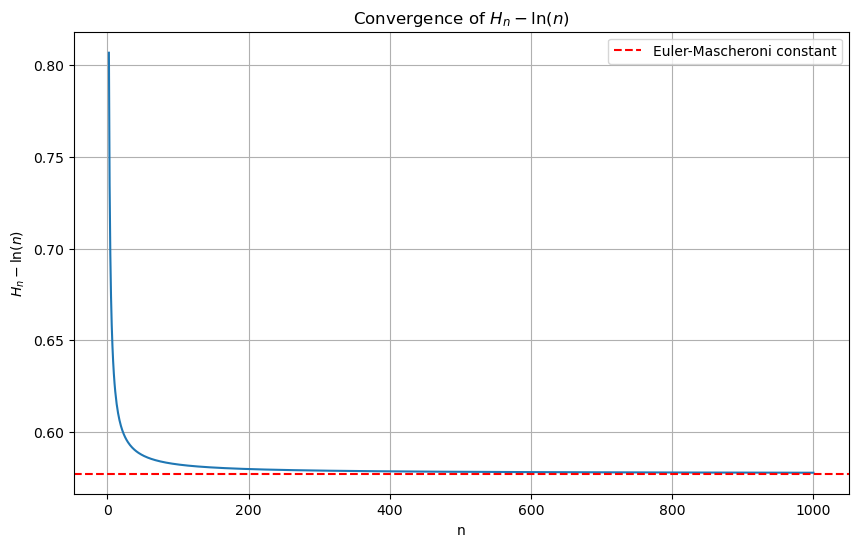

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

n_vals = np.arange(2, 1001)
harmonic_vals = [sum(1/k for k in range(1, n+1)) for n in n_vals]
log_vals = [math.log(n) for n in n_vals]
diff_vals = [h - l for h, l in zip(harmonic_vals, log_vals)]

plt.figure(figsize=(10, 6))
plt.plot(n_vals, diff_vals)
plt.axhline(y=0.5772, color='r', linestyle='--', label='Euler-Mascheroni constant')
plt.title(r'Convergence of $H_n - \ln(n)$')
plt.xlabel('n')
plt.ylabel(r'$H_n - \ln(n)$')
plt.grid(True)
plt.legend()
plt.show()

Moreover, using the equality $$\sum_{k=1}^n \frac{x^k}{k} = -\ln(1 - x) - \int_0^x \frac{t^n}{1 - t} \, dt$$

we can show that $$ \sum_{k=1}^\infty \frac{x^k}{k} = -ln(1-x)$$

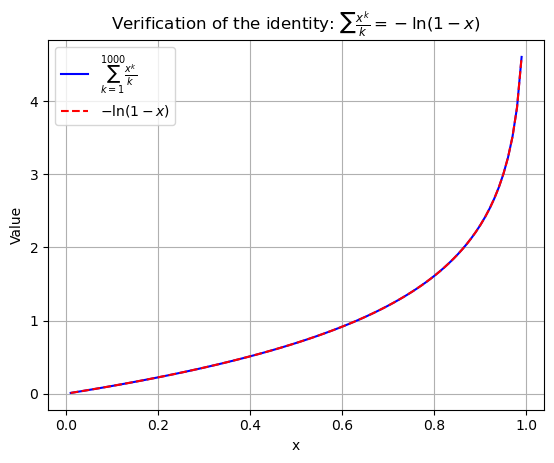

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values in (0, 1)
x_vals = np.linspace(0.01, 0.99, 100)

# Partial sums up to N terms
N = 1000
def approx_ln_series(x, N):
    return sum((x**k)/k for k in range(1, N+1))

# Compute the partial sums and the exact -ln(1 - x)
sums = np.array([approx_ln_series(x, N) for x in x_vals])
ln_values = -np.log(1 - x_vals)

# Plot both curves
plt.plot(x_vals, sums, label=r"$\sum_{k=1}^{%d} \frac{x^k}{k}$" % N, color='blue')
plt.plot(x_vals, ln_values, label=r"$-\ln(1 - x)$", linestyle='--', color='red')
plt.title(r"Verification of the identity: $\sum \frac{x^k}{k} = -\ln(1 - x)$")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## Section 2: Probability and Statistical Analysis


This part studies the distribution of the minimum of $n$ i.i.d. uniform random variables on $(0, 1)$,
as well as derived variables like $Z_n - X_n$ and $T_n = Z_n - U$, where $U$ is an independent uniform variable.
We also analyze $Y_n = n Z_n$ and explore its convergence in distribution.

#### Distribution and Simulation of $Z_n = \min(X_1, \dots, X_n)$

Let X₁, X₂, ..., Xₙ be i.i.d. random variables with uniform distribution on (0, 1).

We define:

$
Z_n = \min(X_1, X_2, \dots, X_n)
$

The cumulative distribution function of  $Z_n$ is:

$$
F_n(x) =
\begin{cases}
0 & \text{if } x < 0 \\
1 - (1 - x)^n & \text{if } x \in [0, 1] \\
1 & \text{if } x > 1
\end{cases}
$$

Since $F_n$ is differentiable on (0, 1), the variable $Z_n$ admits a density given by:

$$
f_n(x) =
\begin{cases}
n(1 - x)^{n - 1} & \text{if } x \in [0, 1] \\
0 & \text{otherwise}
\end{cases}
$$

We now simulate $Z_n$ using Python and compare it to its theoretical density.


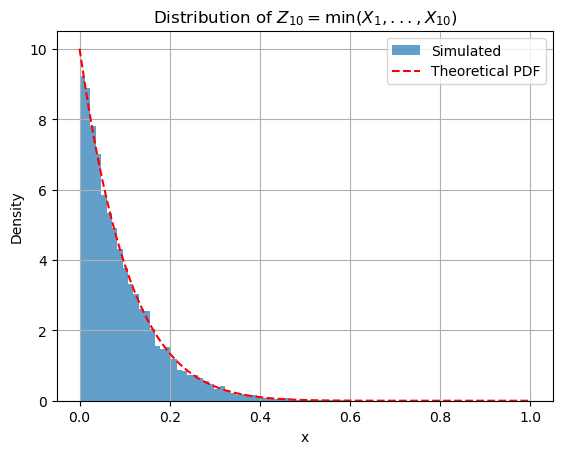

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def VarZ(n):
    return np.min(np.random.random(n))

# Parameters
n = 10
samples = [VarZ(n) for _ in range(10000)]

# Plot histogram of simulated values
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Simulated")

# Theoretical PDF
x_vals = np.linspace(0, 1, 200)
pdf = n * (1 - x_vals) ** (n - 1)
plt.plot(x_vals, pdf, 'r--', label="Theoretical PDF")

plt.title(r"Distribution of $Z_{10} = \min(X_1, ..., X_{10})$")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

#### Study of $T_n = Z_n - U$

Let $U$ be an independent $\mathcal{U}(0, 1)$ variable. Then $T_n = Z_n - U$ is a new variable.

We simulate $T_n$ for $n = 10$ and visualize its distribution.

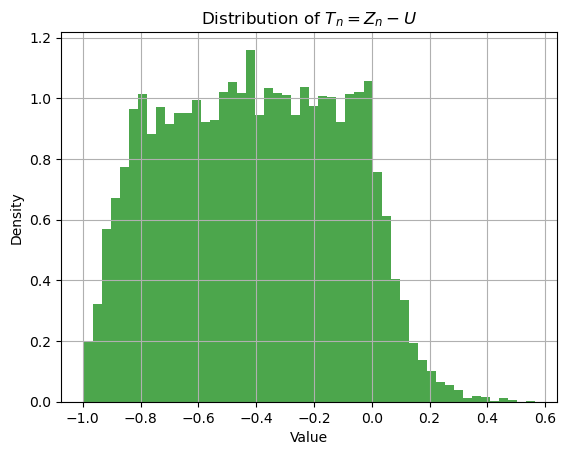

In [15]:
def VarT(n):
    X = np.random.random(n)
    Z = np.min(X)
    U = np.random.random()
    return Z - U

Tn_samples = [VarT(10) for _ in range(10000)]
plt.hist(Tn_samples, bins=50, density=True, alpha=0.7, color='green')
plt.title("Distribution of $T_n = Z_n - U$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()



### Study of $Y_n = n Z_n$ and Convergence in Law

We define $Y_n = n Z_n$ and study the convergence in distribution of $Y_n$ as $n \to\infty$.

Let’s simulate $Y_n$ for increasing values of $n$ and overlay their histograms.


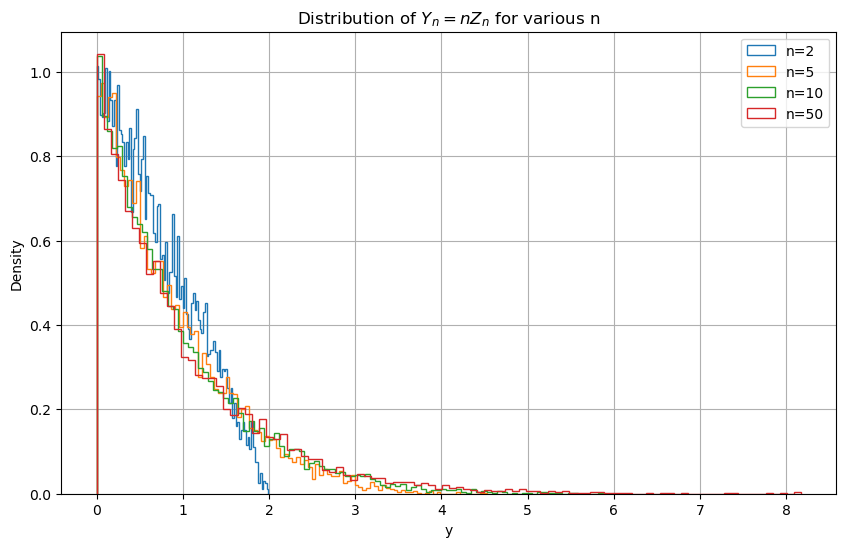

In [16]:
def VarY(n):
    return n * VarZ(n)

# Plot histograms for n = 2, 5, 10, 50
plt.figure(figsize=(10, 6))
for n in [2, 5, 10, 50]:
    samples_Yn = [VarY(n) for _ in range(10000)]
    plt.hist(samples_Yn, bins=100, density=True, histtype='step', label=f'n={n}')

plt.title("Distribution of $Y_n = n Z_n$ for various n")
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


We demonstrated and simulated:

- The distribution of $Z_n = \min(X_1, ..., X_n)$ and its convergence toward 0.
- The behavior of $T_n = Z_n - U$ with $U$ independent.
- The rescaled variable $Y_n = n Z_n$ and its convergence in distribution.

Python simulations confirm the theoretical expectations, providing visual insight into convergence and distributions.

### Further exploration: convergence in Law: $Y_n = n \cdot \min(U_1, \dots, U_n)$

We define:
- $U_1, \dots, U_n$ as i.i.d. variables following the uniform distribution on $[0,1]$
- $Y_n = n \cdot \min(U_1, \dots, U_n)$

**Objective:** Show that $Y_n \overset{\mathcal{L}}{\longrightarrow} \text{Exp}(1)$ as $n \to \infty$.

We will:
- Simulate the distribution of $Y_n$ for large $n$
- Compare with the density of the exponential distribution
- Justify convergence in law analytically

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

#### Simulation of $Y_n$
We generate $m$ repetitions of $n$ i.i.d. uniform values and compute $Y_n$.

In [18]:
n = 1000
m = 10000
samples = np.random.uniform(size=(m, n))
Y_n = n * np.min(samples, axis=1)

#### Histogram and Comparison with Exponential(1) Density

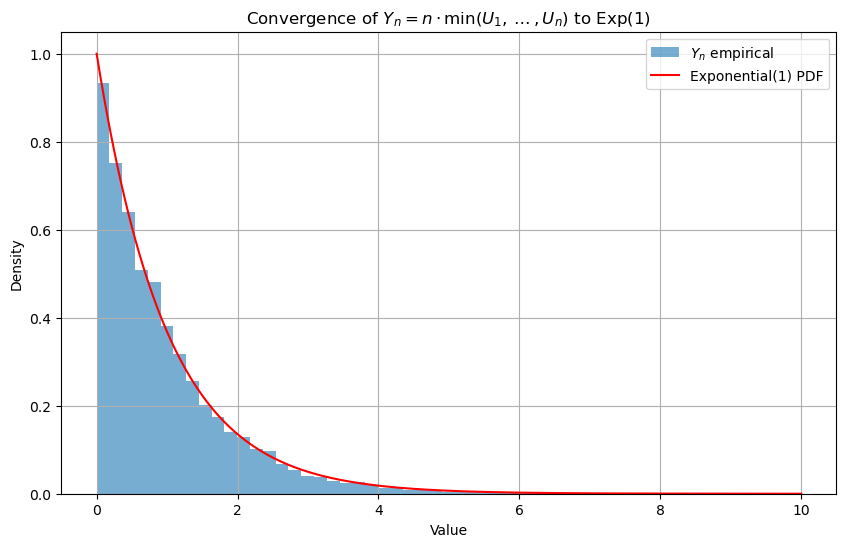

In [19]:
x = np.linspace(0, 10, 200)
plt.figure(figsize=(10,6))
plt.hist(Y_n, bins=50, density=True, alpha=0.6, label=r'$Y_n$ empirical')
plt.plot(x, expon.pdf(x), label='Exponential(1) PDF', color='red')
plt.title(r'Convergence of $Y_n = n \cdot \min(U_1, \dots, U_n)$ to $\text{Exp}(1)$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

#### Theoretical Justification

We recall the formula:
$$ \mathbb{P}(\min(U_1, ..., U_n) > x) = \mathbb{P}(U_1 > x)^n = (1 - x)^n \quad \text{for } x \in [0,1] $$
Then:
$$ \mathbb{P}(Y_n > y) = \mathbb{P}(n \cdot \min > y) = \mathbb{P}(\min > y/n) = (1 - y/n)^n \to e^{-y} $$
Thus, $Y_n \overset{\mathcal{L}}{\longrightarrow} \text{Exp}(1)$ as $n \to \infty$.

## Section 3 – Linear Forms on Finite-Dimensional Vector Spaces

This part addresses the key numerically demonstrable aspects of the final problem of the EM Maths 2023 exam.
It focuses on linear forms, their kernels, images, and links with hyperplanes and matrices.

We only treat parts where Python-based reasoning (symbolic or numerical) provides insight or verification.

### Part I – Concrete Examples

We study applications on the space of polynomials $\mathbb{R}_p[X]$.

We consider functions such as:
- $g(P) = \int_0^1 P(t) \, dt$
- $f(P) = P(0)$

We also construct specific families of polynomials to test kernel properties.

In [20]:
import sympy as sp

x = sp.symbols('x')
# Polynomial of degree <= 4
P = x**3 - 2*x + 1

# Compute g(P) = integral from 0 to 1 of P(t) dt
integral = sp.integrate(P, (x, 0, 1))
integral


1/4


We now check that the family $Q_k(x) = x^k - \frac{1}{k+1}$ belongs to the kernel of $g$.



In [21]:
def Q(k):
    return x**k - 1 / (k + 1)

# Check g(Q_k) = 0 for k from 1 to p
p = 4
[sp.integrate(Q(k), (x, 0, 1)).simplify() for k in range(1, p + 1)]

[0, 0, 0, 0]

In [22]:

# Define a polynomial and evaluate f(P) = P(0)
P = x**3 - 2*x + 1
P.subs(x, 0)


1

### Part II – Hyperplanes and Linear Forms

This part links linear forms with hyperplanes, showing that any hyperplane can be seen as the kernel of a non-zero linear form.

We can also construct explicit examples. For instance:

$$
\varphi(x_1, \dots, x_n) = \sum_{i=1}^{n-1} x_i
$$

Its kernel is the hyperplane $x_1 + \dots + x_{n-1} = 0$.

In [23]:
# Define a linear form φ on R^n (here n = 4)
n = 4
coords = sp.symbols('x1:%d' % (n + 1))  # x1, x2, ..., xn
phi_expr = sum(coords[:-1])  # Sum x1 + x2 + ... + x_{n-1}
phi_expr


x1 + x2 + x3

### Part III – Euclidean Structure and Matrix Representation

We conclude with the study of the mapping from linear forms to matrices acting on  $M_n(\mathbb{R})$.

Given a matrix A, we define the linear form:

$$
\varphi(X) = \mathrm{tr}(AX)
$$

We simulate this numerically.

In [24]:
import numpy as np

# Let A be a fixed matrix
A = np.array([[1, 2], [3, 4]])
# Let X be a variable matrix
X = np.array([[0, 1], [1, 0]])

# Compute φ(X) = tr(A @ X)
phi_X = np.trace(A @ X)
phi_X

5